In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [14]:
#read in data
df = pd.read_csv('Life_Expectancy_Data.csv',sep=r'\s*,\s*', engine='python')

In [15]:
#remove categorical data
df = df._get_numeric_data()

#Deal with missing data
df = df[df['Life expectancy'].notna()] #drop rows without life expectancy value
df= df.fillna(df.mean())# impute other columns with the columns mean

#create numpy matrices
X = df.drop('Life expectancy',axis=1).to_numpy()
X=np.append(np.ones((X.shape[0],1)),X,axis=1) #add column of 1s
y = df['Life expectancy'].to_numpy()

#split train and test
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#initialising weights
theta = np.zeros(X.shape[1])
thetas={} #will store all the thetas found from the various training methods
n=df.shape[0] #number of training examples
d=df.shape[1] #number of features

#parameters
epsilon = 0.1
learning_rate = 0.1

In [16]:
def cost(X,y,theta):
    n_examples= X.shape[0]
    h= np.dot(X,theta) #don't need to transpose theta as in numpy row vectors and column vectors are the same
    return (1/(2*n_examples))*np.sum(np.square(h-y))

In [83]:

def gradient_descent_single_feature(X,y,theta,alpha,epsilon,plot_hyp):
    #plot_hyp = bool to determine whether to plot the hypothesis function. has to be false for
    #multiple features
    
    #plot setup
    if plot_hyp:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        ax1.scatter(X[:,1],y)
        ax1.set_xlabel("adult mortalility")
        ax1.set_ylabel("life expectancy")
        x_plot = np.linspace(0,700,100)
        ax2.set_xlabel("cost")
        ax2.set_xlabel("no. iterations /10000")
    
    #gradient descent
    n= X.shape[0]
    j = []
    i=0
    old_theta=theta +122
    #j.append(cost(X,y,theta))
    #while((np.absolute(old_theta-theta)>epsilon).any()):
    for i in range(300000):
        #i+=1
        if(i%10000 ==0): 
            if plot_hyp:ax1.plot(x_plot, theta[0]+x_plot*theta[1], color='grey')
            print('.', end="")
            j.append(cost(X,y,theta))
        h=np.dot(X,theta)
        error = h-y
        old_theta=theta
        theta= theta - (alpha/n)*(np.dot((error),X))
    
    #output
    if plot_hyp:ax1.plot(x_plot, theta[0]+x_plot*theta[1], color='orange')
    if plot_hyp:ax2.plot(j)
    print(f"\n finished in {i} iterations, Training set cost = {j[len(j)-1]}")
    return theta, j

Text(0, 0.5, 'life expectancy')

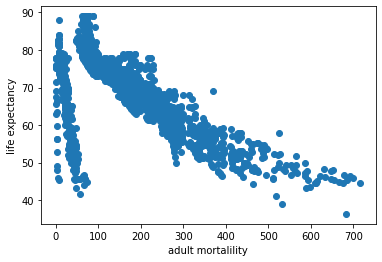

In [76]:
#in this section I will train gradient descent on just 1 feature (adult mortalility)
#to allow for 2 dimensional data representation
#As shown in the figure below,
#Adult mortalility of a country has quite a recognisable relationship with life expectancy
#it is therefore a good feature to use if only using 1.

X_one_feature =X[:,[0,2]] #X matrix containing a row of ones and only the adult mortalility feature
X_test_one_feature = X_test[:,[0,2]]
theta_one_feature=theta[0:2]# 2 dimensional vector of zeros

plt.scatter(X_one_feature[:,1],y)
plt.xlabel("adult mortalility")
plt.ylabel("life expectancy")

..............................
 finished in 299999 iterations, Training set cost = 25.807836321455735
Test set cost = 23.66095947448518


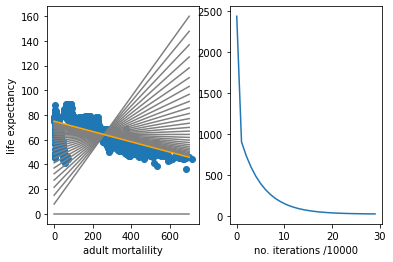

In [80]:
thetas['one-feature'],j = gradient_descent_single_feature(X_one_feature,y,theta_one_feature,0.00003,0.00001,True) #1 feature GD- adult mortality
print(f"Test set cost = {cost(X_test_one_feature,y_test,thetas['one-feature'])}")
#1st plot shows regression line every 10000 iterations and how it moves until it bb
#fits the data

...

<ipython-input-78-0c87e6095683>:32: RuntimeWarning: invalid value encountered in subtract
  theta= theta - (alpha/n)*(np.dot((error),X))


...........................
 finished in 299999 iterations, Training set cost = nan
..............................
 finished in 299999 iterations, Training set cost = 23.94826003587049
..............................
 finished in 299999 iterations, Training set cost = 25.807836321455735
..............................
 finished in 299999 iterations, Training set cost = 40.706805985521996
..............................
 finished in 299999 iterations, Training set cost = 160.07681595331763
..............................
 finished in 299999 iterations, Training set cost = 911.1602831399639


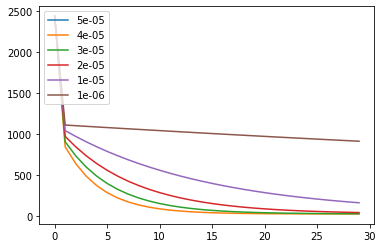

In [82]:
#test learning rate convergence/divergence
alphas = [0.00005,0.00004,0.00003,0.00002,0.00001,0.000001]
fig1, ax3 = plt.subplots()
for lr in alphas:
    _,j = gradient_descent_single_feature(X_one_feature,y,theta_one_feature,lr,0.00001,False)
    ax3.plot(j, label = lr)
    ax3.legend(loc="upper left")

#as seen in the outputs below GD diverged with the first learning rate
#Out of the remaining learning rates that were plotted 0.00004 converges the fastest 
#and is therefore the ideal learning rate
    


In [31]:
#multiple feature gradient_descent
#it is the same as the gradient_descent_single_feature but without plots that cannot be
#represented in high dimensions
def gradient_descent(X,y,theta,alpha,epsilon):
    #gradient descent
    n= X.shape[0]
    j = []
    i=0
    old_theta=theta +100000
    j.append(cost(X,y,theta))
    #while((np.absolute(old_theta-theta)>epsilon).any()):
    for i in range(300000):
        i+=1
        j.append(cost(X,y,theta))
        if(i%10000 ==0): 
            #ax1.plot(x_plot, theta[0]+x_plot*theta[1], color='grey')
            print(j[len(j)-1], end=" ")
            #print('.', end="")
            
        h=np.dot(X,theta)
        old_theta=theta
        theta= theta - (alpha/n)*(np.dot((h-y),X))
    #print(j)
    print(f"\n finished in {i} iterations, training set cost = {j[len(j)-1]}")
    return theta

In [118]:
thetas['base']=gradient_descent(X,y,theta,0.0000000000000001,0.0000000001)
print(f"Test set cost = {cost(X_test,y_test,thetas['base'])}")
#since data isn't normalised a very low learning rate is needed in order to not diverge
#it therefore takes very long to reach a good final cost

2297.724056936111 2297.401322265988 2297.0787299279054 2296.756279857048 2296.4339719886298 2296.111806257892 2295.789782600109 2295.4679009505817 2295.146161244642 2294.8245634176506 2294.503107404999 2294.181793142106 2293.8606205644232 2293.539589607428 2293.2187002066303 2292.897952297567 2292.577345815806 2292.256880696944 2291.9365568766084 2291.6163742904537 2291.296332874165 2290.976432563457 2290.656673294074 2290.337055001789 2290.017577622404 2289.698241091751 2289.379045345692 2289.0599903201155 2288.741075950943 2288.4223021741227 
 finished in 300000 iterations, training set cost = 2288.4223021741227
Test set cost = 2401.3787291349654


In [119]:
#feature scaling
X_standardised=X.copy()
X_test_standardised = X_test.copy()
print(X.shape)
for i in range(1,X.shape[1]):
    X_standardised[:,i] = (X[:,i]-np.mean(X[:,i]))/np.std(X[:,i])
    X_test_standardised[:,i]=(X_test[:,i]-np.mean(X_test[:,i]))/np.std(X_test[:,i])
    #new_X[:,i] = (new_X[:,i]-1)

(2342, 20)


In [120]:

thetas['standardised']= gradient_descent(X_standardised,y,theta,0.01,0.000001)
print(f"Test set cost = {cost(X_test_standardised,y_test,thetas['standardised'])}")

8.542809577302902 8.448981557136081 8.397518702888913 8.369292317885973 8.35381068901035 8.345319313560843 8.340661957567889 8.338107487450056 8.336706409758593 8.335937945612622 8.335516457819875 8.335285279878306 8.335158483227046 8.335088937704397 8.335050793323829 8.335029871865288 8.33501839684797 8.335012103021842 8.335008650979356 8.335006757600494 8.33500571911863 8.33500514953132 8.33500483712364 8.335004665774045 8.335004571792087 8.335004520244794 8.335004491972095 8.335004476465064 8.335004467959756 8.335004463294759 
 finished in 300000 iterations, training set cost = 8.335004463294759
Test set cost = 8.1284208281363


In [123]:
def gradient_descent_regularized(X,y,theta,alpha,epsilon,lambd):
    #gradient descent
    n= X.shape[0]
    j = []
    i=0
    old_theta=theta +100000
    j.append(cost(X,y,theta))
    #while((np.absolute(old_theta-theta)>epsilon).any()):
    for i in range(300000):
        i+=1
        j.append(cost(X,y,theta))
        if(i%10000 ==0): 
            #ax1.plot(x_plot, theta[0]+x_plot*theta[1], color='grey')
            print(j[len(j)-1], end=" ")
            #print('.', end="")
            
        h=np.dot(X,theta)
        old_theta=theta
        theta= theta*(1-(alpha*lambd)/n) - (alpha/n)*(np.dot((h-y),X))
    #print(j)
    print(f"\n finished in {i} iterations, final cost = {j[len(j)-1]}")
    return theta

In [ ]:
thetas['regularized'] = gradient_descent_regularized(X_standardised,y,theta,0.01,0.000001,0.4)
print(f"Test set cost = {cost(X_test_standardised,y_test,thetas['regularized'])}")

8.544055477923516 8.451924296325956 8.401576727407594 8.373788293560313 8.358257033106938 8.349440841436783 8.34434277512815 8.34133110526968 8.33950948886578 8.338379928862667 8.337661798179745 8.337194219256183 8.33688308728413 8.336672092352087 8.336526706395402 8.336425219872238 8.336353644516374 8.336302759478142 8.336266362124473 8.33624020727712 8.33622134769164 8.336207713665914 